In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [180]:
data = pd.read_csv('/content/drive/My Drive/Dataset/DataQuiz/ionosphere_data_kaggle.csv')

In [158]:
#dataCleaning
#replace nilai ? dengan none
dataset.replace("?", np.nan, inplace=True)

dataset.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [159]:
#Cek apakah ada nilai null
dataset.isnull().sum().sort_values()

feature1     0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature19    0
feature26    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature27    0
feature34    0
feature18    0
feature16    0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature17    0
feature8     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature9     0
label        0
dtype: int64

Tidak ada nilai nan

In [160]:
#cek info dari setiap feature
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [161]:
#Karena label isinya g dan b, yang merupakan type string. Maka harus diubah dahulu. saya ubah menjadi nilai 0 dan 1. ini termasuk data clasiffication
cleanup_nums = {
    'label' : {
        'g' : 1,
        'b' : 0
    }
}

dataset.replace(cleanup_nums, inplace=True)
dataset.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [162]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

tipe data label sudah menjadi int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6182a0b38>,
      dtype=object)

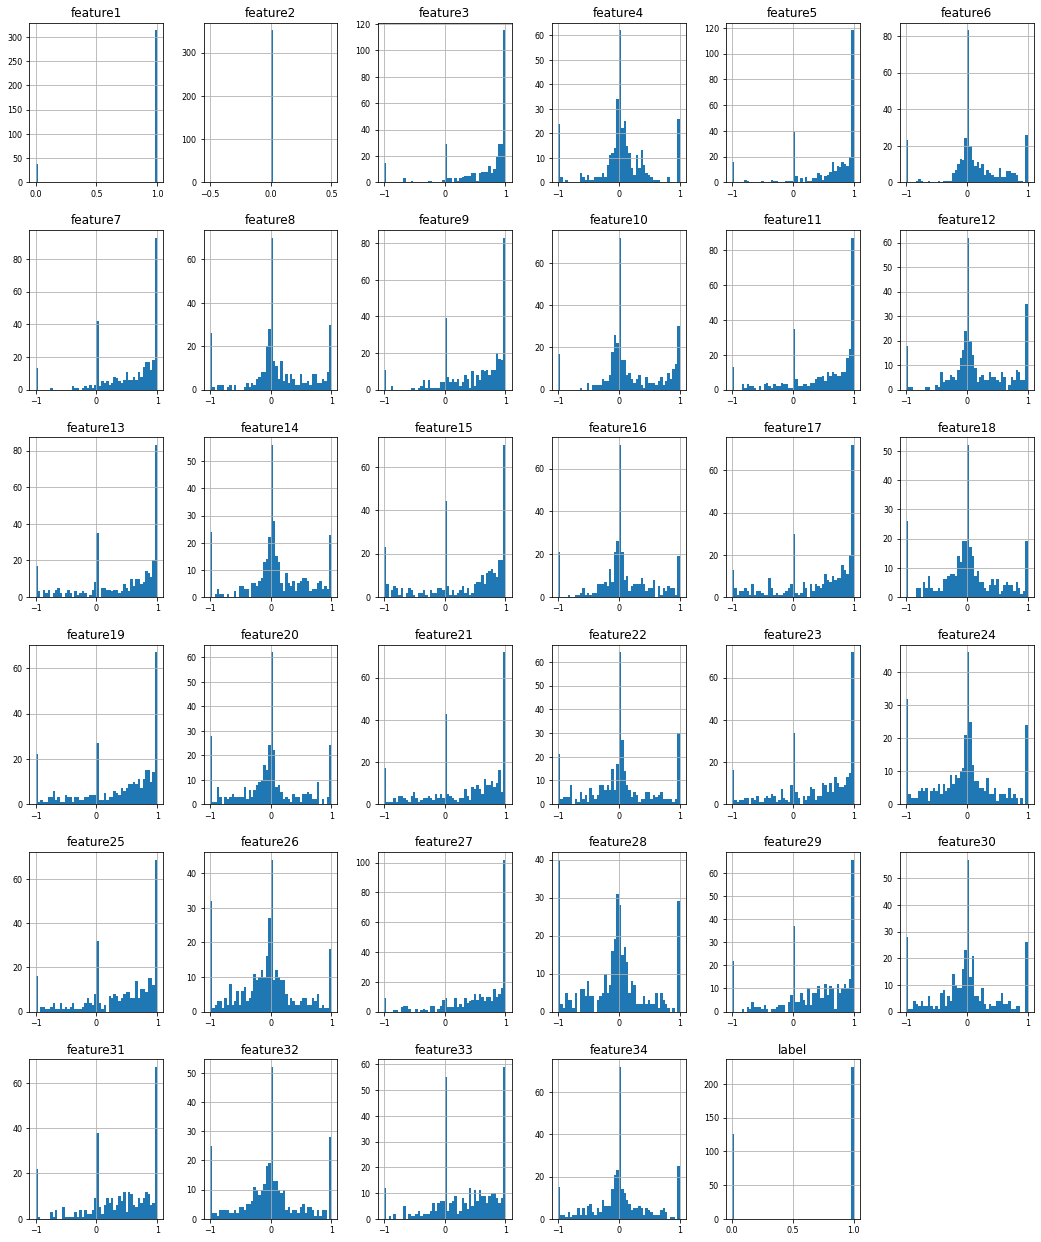

In [163]:
#plot grafik histogram
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

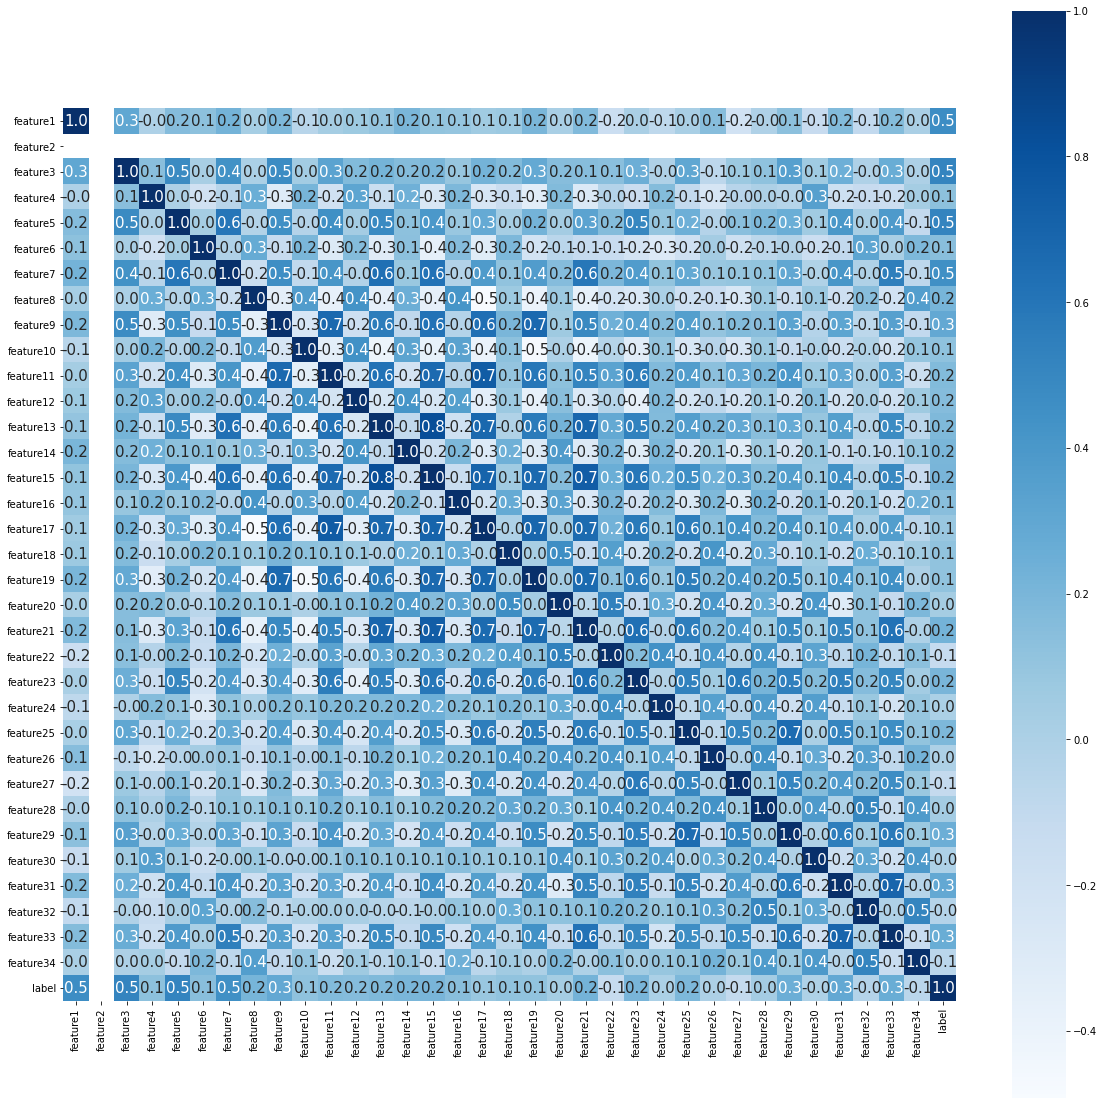

In [164]:
#melihat corelasi, fitur terlalu banyak
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

Menggunakan Tensorflow

In [182]:
# split into input (X) and output (Y) variables
from sklearn.preprocessing import LabelEncoder
X = data.values[1:,0:34].astype(float)
Y = data.values[1:,34]
#atau untuk feature dan label bisa pakai dataset.drop

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [183]:
# create model
model = Sequential()
model.add(Dense(34, input_dim=34 , activation= 'relu' ))
model.add(Dense(1,  activation= 'sigmoid' ))

In [184]:
# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss= 'binary_crossentropy' , optimizer=sgd, metrics=[ 'accuracy' ])

In [185]:
# Fit the model
model.fit(X, Y, validation_split=0.2, epochs=epochs, batch_size=8, verbose=2)

Epoch 1/50
35/35 - 0s - loss: 0.5218 - accuracy: 0.7321 - val_loss: 0.2281 - val_accuracy: 0.9857
Epoch 2/50
35/35 - 0s - loss: 0.3380 - accuracy: 0.8643 - val_loss: 0.4590 - val_accuracy: 0.8571
Epoch 3/50
35/35 - 0s - loss: 0.2071 - accuracy: 0.9321 - val_loss: 0.1308 - val_accuracy: 0.9571
Epoch 4/50
35/35 - 0s - loss: 0.1533 - accuracy: 0.9607 - val_loss: 0.0538 - val_accuracy: 1.0000
Epoch 5/50
35/35 - 0s - loss: 0.1407 - accuracy: 0.9500 - val_loss: 0.0590 - val_accuracy: 1.0000
Epoch 6/50
35/35 - 0s - loss: 0.1191 - accuracy: 0.9643 - val_loss: 0.0457 - val_accuracy: 0.9857
Epoch 7/50
35/35 - 0s - loss: 0.1052 - accuracy: 0.9607 - val_loss: 0.0388 - val_accuracy: 1.0000
Epoch 8/50
35/35 - 0s - loss: 0.0964 - accuracy: 0.9679 - val_loss: 0.0609 - val_accuracy: 0.9857
Epoch 9/50
35/35 - 0s - loss: 0.0929 - accuracy: 0.9679 - val_loss: 0.0350 - val_accuracy: 1.0000
Epoch 10/50
35/35 - 0s - loss: 0.0753 - accuracy: 0.9786 - val_loss: 0.0383 - val_accuracy: 1.0000
Epoch 11/50
35/35 -

In [188]:
# evaluate the model
scores = model.evaluate(X, Y)
print(model.metrics_names[1], scores[1]*100)

11/11 [==============================] - 0s 2ms/step - loss: 0.0239 - accuracy: 0.9971
accuracy 99.71428513526917
